In [1]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../../modules')

/g/g92/samuele/nEXO/sensitivity/work/SensitivityPaper2020_scripts/PaperPlots


In [2]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os
from cycler import cycler
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

In [3]:
# Import the nEXO sensitivity classes

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood
import nEXOMaterialsDBInterface

import importlib
importlib.reload( nEXOMaterialsDBInterface )
importlib.reload( nEXOFitWorkspace )
importlib.reload( nEXOFitModel )

<module 'nEXOFitModel' from '../../../modules/nEXOFitModel.py'>

In [4]:
optimized_binning_yaml = '../../config/Sensitivity2020_Optimized_DNN_Standoff_Binning_version1_no_n_xy_ch_abovenoise_cut.yaml'
workspace2020_d024 = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)
workspace2020_d024_ind = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)

optimized_binning_components_table = '/p/vast1/nexo/sensitivity2020/pdfs/component_tables/ComponentsTable_D-024_merged-v11_Optimized_DNN_Standoff_Binning_version1_no_n_xy_ch_abovenoise_cut.h5'
workspace2020_d024.LoadComponentsTableFromFile(optimized_binning_components_table)
workspace2020_d024_ind.LoadComponentsTableFromFile(optimized_binning_components_table)




Loading input data froma previously-generated components table....

Loaded dataframe with 138 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	Material
	Radioassay ID
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']

Loading input data froma previously-generated components table....

Loaded dataframe with 138 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	Material
	Radioassay ID
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']


In [5]:
#Create the PDFs for the standard model
workspace2020_d024.CreateGroupedPDFs()
model2020_d024 = nEXOFitModel.nEXOFitModel()
model2020_d024.AddPDFsFromDataframe(workspace2020_d024.df_group_pdfs,\
                               workspace2020_d024.histogram_axis_names)
model2020_d024.GenerateModelDistribution()


Creating grouped PDFs....
no sigma for Rn222_HFE (R-053.9.1.1)
no sigma for Ar42_ActiveLXeAr-42 (R-088.2.3.1)
no sigma for Ar42_InactiveLXeAr-42 (R-088.3.3.1)

ERROR: No histogram available for K40_OuterCryostatWTSupport

ERROR: No histogram available for Co60_OuterCryostatWTSupport
	Group:                              	Expected Counts:
	Far                                 	      6558.0678
	Vessel_U238                         	      2291.3914
	Vessel_Th232                        	       642.1091
	Internals_U238                      	      6466.9496
	Internals_Th232                     	      2878.5627
	Rn222                               	     23574.8031
	FullTPC_K40                         	  49139854.5092
	B8nu                                	        13.6009
	FullLXeBb2n                         	  16325786.5724
	FullLXeBb0n                         	         0.0001
	Xe137_and_Ar42                      	        23.4207
	Total Sum                           	  65508089.9870


Hist(14 bins in [0.0,1.0], 250 bins in [1000.0,3500.0], 22 bins in [0.0,650.0], with sum 65508089.98704756, 7466 empty bins, and 0 non-finite values)

In [6]:
roi_cut_dict_2020_d024 = {'DNN': (0.86,1.),
                    'Energy (keV)': (2434., 2480.),
                    'Standoff (mm)': (104.5, 650.)
                    }

workspace2020_d024.DefineROI( roi_cut_dict_2020_d024 )

DNN:
	Input ROI boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input ROI boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input ROI boundaries:     104.5,    650.0
	Actual ROI boundaries:    100.0,    650.0


In [7]:
likelihood2020 = nEXOFitLikelihood.nEXOFitLikelihood()
likelihood2020.AddPDFDataframeToModel(workspace2020_d024.df_group_pdfs,\
                                      axis_names=workspace2020_d024.histogram_axis_names)

sig_idx = likelihood2020.model.GetVariableIndexByName('Bb0n')
likelihood2020.model.variable_list[sig_idx]['Value'] = 11.81


likelihood2020.AddDataset( likelihood2020.model.GenerateDataset() )

likelihood2020.PrintVariableList()


Variable name:          Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far                 6.558e+03    False     None       80.98         False          (None,None)
Num_Vessel_U238         2.291e+03    False     None       47.87         False          (None,None)
Num_Vessel_Th232        642.1        False     None       25.34         False          (None,None)
Num_Internals_U238      6.467e+03    False     None       80.42         False          (None,None)
Num_Internals_Th232     2.879e+03    False     None       53.65         False          (None,None)
Num_Rn222               2.357e+04    False     None       153.5         False          (None,None)
Num_FullTPC_K40         4.914e+07    False     None       7.01e+03      False          (None,None)
Num_B8nu                13.6         False     None       3.688         False          (None,None)
Num_FullLXeBb2n         1.633e+07    False     None       4.041e+03     False          (None,None)
Num_Full

In [8]:
# Set up the plotting parameters
initial_cycler = plt.rcParams['axes.prop_cycle']
plt.rcParams.update({'font.size': 14})
custom_cycler = cycler( color = [ (1.,0.5,0.),\
                                 (0.,0.,1.,0.5),\
                                 (0.,0.8,0.),\
                                 (1.,0.,0.),\
                                 (0.5,1.,0.5),\
                                 (0.,0.8,0.8),\
                                 (0.1,0.6,0.5),\
                                 (1.,0.,1.),\
                                 (0.5,0.,0.5) ] ) 
plt.rc('axes', prop_cycle=custom_cycler)


labels_dict = {"Far": "Far components",
"VesselU238": r'$^{238}$U TPC Vessel',
"VesselTh232": r'$^{232}$Th TPC Vessel',
"InternalsU238": r'$^{238}$U Internals',
"InternalsTh232": r'$^{232}$Th Internals',
"Rn222": r'Internal $^{222}$Rn',
"FullTPCK40": r'$^{40}$K (all)',
"B8nu": r'Solar $\nu$',
"FullLXeBb2n": r'$^{136}$Xe $2\nu\beta\beta$',
"FullLXeBb0n": r'$^{136}$Xe $0\nu\beta\beta$',
"Xe137andAr42": r'$^{137}$Xe and $^{42}$Ar'}


colors_dict = {"Far": (1.,0.5,0.),
"VesselU238": (0.6,0.2,0.3),
"VesselTh232": (0.,0.8,0.),
"InternalsU238": (1.,0.,0.),
"InternalsTh232": (0.5,1.,0.5),
"Rn222": (0.,0.8,0.8),
"FullTPCK40": (0.8,0.7,0.),
"B8nu": (0.5,0.,0.5),
"FullLXeBb2n": (0.7,0.7,0.7),
"FullLXeBb0n": (0.1,0.1,1.0),
"Xe137andAr42": (1.,0.,1.)}

categories_dict = {"Far": 'External',
"VesselU238": 'External',
"VesselTh232": 'External',
"InternalsU238": 'External',
"InternalsTh232": 'External',
"Rn222": 'External',
"FullTPCK40": 'External',
"B8nu": 'Internal',
"FullLXeBb2n": 'Bb2n',
"FullLXeBb0n": 'Bb0n',
"Xe137andAr42": 'Internal'}


from scipy.interpolate import interp1d

def fiducial_mass( standoff ):
    
    rho = 0.003057/1.e6 # g/cm3
    rfsr = 71.85 # mm
    dtpc = 1277 # mm
    zdrift = 1183 # mm
    
    return rho * ( np.pi * (dtpc/2 - rfsr - standoff)**2 * (zdrift - 2*standoff) )

standoffs = np.linspace(0.,650.,100000)
masses = fiducial_mass(standoffs)*1000.

standoff_vs_mass = interp1d(masses,standoffs)





In [9]:
masses = [3281.,3000.,2500.,2000.,1500.,1000.,500.]

for mass in masses:
    print('{:6.6}kg \t {:4.4}mm'.format(mass,standoff_vs_mass(mass)))

3281.0kg 	 19.96mm
3000.0kg 	 36.27mm
2500.0kg 	 68.02mm
2000.0kg 	 104.3mm
1500.0kg 	 147.3mm
1000.0kg 	 201.4mm
 500.0kg 	 278.3mm


# LIGO plot

In [10]:
# thislambda = 0.

# counter = 1


# #while (thislambda < 8.)|(thislambda>9.):
# #while False:
# while counter == 1:
    
#     print('\n\nAttempt {}\n'.format(counter))

#     workspace2020_d024.CreateGroupedPDFs()

#     likelihood2020 = nEXOFitLikelihood.nEXOFitLikelihood()
#     likelihood2020.AddPDFDataframeToModel(workspace2020_d024.df_group_pdfs,\
#                                           axis_names=workspace2020_d024.histogram_axis_names)

#     sig_idx = likelihood2020.model.GetVariableIndexByName('Bb0n')
#     likelihood2020.model.variable_list[sig_idx]['Value'] = 11.81 * 10

#     likelihood2020.model.GenerateModelDistribution()

#     dataset = likelihood2020.model.GenerateDataset()
#     likelihood2020.AddDataset( dataset )

#     likelihood2020.PrintVariableList()

#     initial_guess = np.copy(likelihood2020.GetVariableValues())


#     for var in likelihood2020.model.variable_list:
#                 if 'Bb0n' in var['Name']:
#                     likelihood2020.SetVariableLimits( var['Name'], \
#                                               lower_limit = -15., \
#                                               upper_limit = 100.)
#                 elif 'Co60' in var['Name']:
#                     likelihood2020.SetVariableLimits( var['Name'], \
#                                               lower_limit = 0., \
#                                               upper_limit = var['Value']*10.)
#                 else: 
#                     likelihood2020.SetVariableLimits( var['Name'], \
#                                               lower_limit = var['Value']*0.1, \
#                                               upper_limit = var['Value']*10.)

#     likelihood2020.SetFractionalMinuitInputError('Num_FullLXeBb0n', 0.01/0.0001)
#     likelihood2020.SetAllVariablesFloating()

#     rn222_idx = likelihood2020.model.GetVariableIndexByName('Rn222')
#     # Fluctuate Rn222 constraint
#     rn222_constraint_val = (np.random.randn()*0.1 + 1)*initial_guess[rn222_idx]
#     # Set Rn222 constraint
#     likelihood2020.SetGaussianConstraintAbsolute(likelihood2020.model.variable_list[rn222_idx]['Name'],\
#                                              rn222_constraint_val, \
#                                              0.1 * initial_guess[rn222_idx])
#     b8_idx = likelihood2020.model.GetVariableIndexByName('B8')
#     # Fluctuate B8nu constraint
#     b8_constraint_val = (np.random.randn()*0.1 + 1)*initial_guess[b8_idx]
#     # Set B8nu constraint
#     likelihood2020.SetGaussianConstraintAbsolute(likelihood2020.model.variable_list[b8_idx]['Name'],\
#                                              b8_constraint_val, \
#                                              0.1 * initial_guess[b8_idx])


#     lambda_fit_result = likelihood2020.ComputeLambdaForPositiveSignal(\
#                                                                     initial_values=initial_guess,\
#                                                                     signal_name='Bb0n',\
#                                                                     signal_expectation=0.,\
#                                                                     print_level=1,\
#                                                                     fixed_fit_signal_value=0.)
#     print('\nLambda: {:4.4}\n'.format(lambda_fit_result['lambda']))
    
#     thislambda = lambda_fit_result['lambda']


#     likelihood2020.PrintVariableList()
    
#     counter += 1



In [11]:
thisdataset = likelihood2020.dataset

In [12]:
import pickle

# with open('Data/example_toy_datset_0.74e26years.pkl','wb') as pklfile:
#     pickle.dump(thisdataset,pklfile)

with open('Data/example_toy_datset.pkl','rb') as pklfile:
    likelihood2020.dataset = pickle.load(pklfile)

    dataset = likelihood2020.dataset

In [13]:
print(likelihood2020.dataset)

Hist(14 bins in [0.0,1.0], 250 bins in [1000.0,3500.0], 22 bins in [0.0,650.0], with sum 55444250, 42933 empty bins, and 0 non-finite values)


In [14]:
# def fiducial_mass(standoff):
#     density = 3.01 # g/cm3
#     d = 113.3 # cm
#     max_drift = 118.3 # cm
#     return density * (np.pi * (d/2. - standoff)**2 * (max_drift - 2*standoff)) / 1000.

In [15]:
# print(fiducial_mass(19.9))

## LXe mass dependence plot

The plot below shows the signal and background curves as a function of the LXe mass. The `n_ch_x_abovenoise` and `n_ch_y_abovenoise` cuts make the 0nbb curve appears non-flat. Make sure the plots are made after loading the specific histograms and components table w/o these cuts.  

The background curve have also non-gamma backgrounds but they have a very small impact. Note that the background curve is expected approximately exponential in standoff units but not technically exponential in mass units. It is a bit surprising that it fits so well with an exponential. The function `exp(-lambda*r^1/3)` does drop quickly but with a behaviour different than an exponential

Num_Far 6558.067754412289
Total Num_Far counts in spectrum:  3.3861557435415683
Num_Vessel_U238 2291.391373052515
Total Num_Vessel_U238 counts in spectrum:  1.4765038154464696
Num_Vessel_Th232 642.1091130888757
Total Num_Vessel_Th232 counts in spectrum:  0.6758018239769711
Num_Internals_U238 6466.949639259376
Total Num_Internals_U238 counts in spectrum:  4.22461867437163
Num_Internals_Th232 2878.5627289392723
Total Num_Internals_Th232 counts in spectrum:  0.9219299557627877
Num_Rn222 23574.803111733214
Total Num_Rn222 counts in spectrum:  16.212815655057895
Num_FullTPC_K40 49139854.50924045
Total Num_FullTPC_K40 counts in spectrum:  0.0
Num_B8nu 13.600884184211834
Total Num_B8nu counts in spectrum:  0.1929569696930858
Num_FullLXeBb2n 16325786.572434425
Total Num_FullLXeBb2n counts in spectrum:  0.11231669341803723
Num_FullLXeBb0n 11.81
Total Num_FullLXeBb0n counts in spectrum:  7.360112737868595
Num_Xe137_and_Ar42 23.42066801948178
Total Num_Xe137_and_Ar42 counts in spectrum:  0.245648

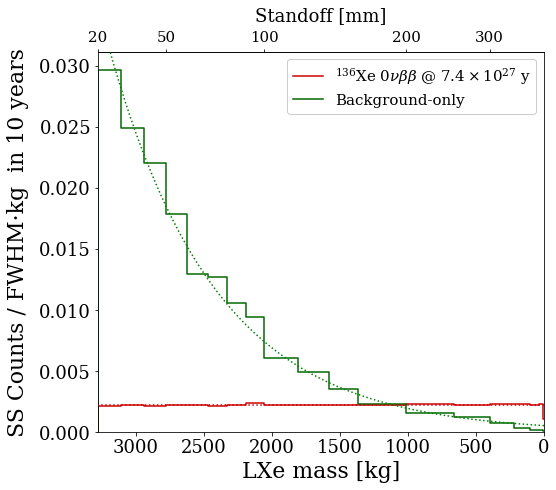

In [35]:
categories_dict = {
"Far": 'Other bkgs',
"VesselU238": 'Other bkgs',
"VesselTh232": 'Other bkgs',
"InternalsU238": 'Other bkgs',
"InternalsTh232": 'Other bkgs',
"Rn222": 'Other bkgs',
"FullTPCK40": 'Other bkgs',
"B8nu": 'Other bkgs',
"FullLXeBb2n": 'Bb2n',
"FullLXeBb0n": 'Bb0n',
"Xe137andAr42": 'Other bkgs'}

ss_cut_dict_list = [{'DNN': (0.85,1.),
                    'Energy (keV)': (2434., 2480.),
#                     'Energy (keV)': (0, 4000),
                    'Standoff (mm)': (0., 650.)
                    }]


plot_data = False      # add toy data set 
differential = True   # normalize by unit mass (kg)
multiple_0nbb_cases = False # draw 0nbb curve for multiple half-lives values
show_legend = True

def fiducial_mass_kg(standoff):
    return fiducial_mass(standoff)*1000

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots (1, 1, figsize=(8, 7), sharex=True, sharey = True, gridspec_kw={'wspace':0.0,'hspace':0.0})

# Loop over components and create the summed pdfs
for i in range(len(likelihood2020.model.variable_list)):
    var = likelihood2020.model.variable_list[i]
    if 'Num' in var['Name']:

        weight = var['Value']
        print(var['Name'], var['Value'])

        cut_pdf = likelihood2020.model.GetSlicedDistribution( ss_cut_dict_list[0], var_name=var['Name'], verbose=False )
        component_name = ''.join( var['Name'].split('_')[1:] )
        #print('Plotting {}'.format(component_name))

        if i == 0:
            # Initialize the summed histograms      
            cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            backgrounds_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)

        cut_pdf_single_axis = cut_pdf.project([2])
        new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins, cut_pdf_single_axis.values)
        if 'Bb0n' not in component_name:
            backgrounds_sum += ( weight * cut_pdf )
        else: 
#             weight = weight
#             print(cut_pdf_single_axis.bins)
        #         print(bin_widths)
        #         print(np.sum(new_cut_pdf_single_axis.values))
            new_cut_pdf_single_axis_t = new_cut_pdf_single_axis.transform_bins(fiducial_mass_kg)
#             print(new_cut_pdf_single_axis_t.bins)
            h0 = hl.Hist(new_cut_pdf_single_axis_t.bins, new_cut_pdf_single_axis.values)
#             print(np.sum(h0.values))
        print(f"Total {var['Name']} counts in spectrum: ", np.sum((weight * new_cut_pdf_single_axis).values))
        cut_sum += ( weight * cut_pdf )

    
if differential: 
    bin_widths_t = -(h0.bins[0][1:] - h0.bins[0][:-1])
#     print(bin_widths_t)
else: 
    bin_widths_t = 1
    
if multiple_0nbb_cases:
    hl.plot1d( ax, (118.1 * h0 / bin_widths_t), label=r'$^{136}$Xe $0\nu\beta\beta$ @ $0.74\times 10^{27}$ y', \
                                    color=(0.4,0.,0.), alpha=1, zorder=-3 )
#     hl.plot1d( ax, (29.22 * h0 / bin_widths_t), label=r'$^{136}$Xe $0\nu\beta\beta$ @ $5.0\times 10^{27}$ y', \
#                                     color=(0.6,0.,0.), alpha=1, zorder=-3 )
hl.plot1d( ax, (11.81 * h0 / bin_widths_t), label=r'$^{136}$Xe $0\nu\beta\beta$ @ $7.4\times 10^{27}$ y', \
                                color=(0.8,0.,0.), alpha=1, zorder=-3 )


this_label=r'Background-only'

backgrounds_sum_single_axis = backgrounds_sum.project([2])
backgrounds_sum_single_axis = hl.Hist(backgrounds_sum_single_axis.bins,\
                                              backgrounds_sum_single_axis.values,\
                                              )
backgrounds_sum_single_axis_t = backgrounds_sum_single_axis.transform_bins(fiducial_mass_kg)
# print(backgrounds_sum_single_axis_t.bins)

# bin_widths_t = -(backgrounds_sum_single_axis_t.bins[0][1:] - backgrounds_sum_single_axis_t.bins[0][:-1])

#     hl.plot1d(ax[0,j],backgrounds_sum_single_axis,color=(0.,.4,0),linewidth=2,\
#               label='',linestyle='-',zorder=-2)
# hl.fill_between( ax, 0, backgrounds_sum_single_axis_t/bin_widths_t, label=this_label, color=(0.,0.4,0.), alpha=0.5, zorder=-2 )
hl.plot1d( ax, backgrounds_sum_single_axis_t/bin_widths_t, label=this_label, color=(0.,0.4,0.), alpha=1, zorder=-2 )
print("Total background counts: ", np.sum(backgrounds_sum_single_axis_t.values))


if plot_data:
    cut_sum_single_axis = cut_sum.project([2])
    new_cut_sum_single_axis = hl.Hist(cut_sum_single_axis.bins, cut_sum_single_axis.values)
    new_cut_sum_single_axis_t = new_cut_sum_single_axis.transform_bins(fiducial_mass_kg)
    hl.plot1d(ax, new_cut_sum_single_axis_t/bin_widths_t,color='k',label=r'Signal+Background',linewidth=2)

    cut_data = likelihood2020.GetSlicedDataset( ss_cut_dict_list[0], verbose=True )

    cut_data_1d = cut_data.project([2])
    bin_centers = (backgrounds_sum_single_axis_t.bins[0][:-1]+backgrounds_sum_single_axis_t.bins[0][1:])/2.
    ax.errorbar(bin_centers,cut_data_1d.values/bin_widths_t,yerr=np.sqrt(cut_data_1d.values)/bin_widths_t,\
                                              fmt='ok',markersize=5,label='Toy Data Sample')

    
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(3281.,0.)
# ax.set_xlim(0.,3281.)
#ax[1,j].set_xlabel('{}'.format(likelihood2020.model.axis_names[1]))
ax.set_ylabel(f'SS Counts / FWHM{"·kg " if differential else ""} in 10 years', labelpad=10, fontsize=22)
ax.set_xlabel('LXe mass [kg]', fontsize=22)
#ax[j].yaxis.set_label_coords(-0.13,0.8)
ax.tick_params(axis='both', which='major', pad=3, labelsize=18)
# ax.set_xticks([1000.,1500.,2000.,2500.,3000.])
# ax.set_xticklabels(['1.0','1.5','2.0','2.5','3.0'])
ax.legend(framealpha=1.)

# ax.set_ylim(1e-4,8)
# ax.set_ylim(1e-4,3e-2)
ax.set_ylim(0, None)

# def mass_from_sd() = standoff_vs_mass/1000.

# second x-axis with standoff
ax2 = ax.secondary_xaxis('top', functions=(lambda x: standoff_vs_mass(x), fiducial_mass_kg))

standoffs = [0, 20, 50, 100, 200, 300, 600]
standoffs_labels = [f'{standoff}' for standoff in standoffs]
mass_standoffs = [fiducial_mass_kg(standoff) for standoff in standoffs]
# print(mass_standoffs)
ax2.set_xlim(0.,3281.)
ax2.set_xticks(standoffs)
# ax2.set_xticklabels(standoffs_labels)
ax2.set_xlabel('Standoff [mm]',labelpad=10, fontsize=18)
# plt.setp(ax2.get_xticklabels())

def exponent(x, a, x0, tau):
    return a * np.exp(-(-x-x0)/tau)

from scipy import stats, optimize
bb = backgrounds_sum_single_axis_t.bins[0]
bw = bin_widths_t
vv = backgrounds_sum_single_axis_t.values
hhh = hl.Hist(bb,vv/bw)
# params, cov = hhh.curve_fit(lambda x, a, loc, scale: stats.expon.pdf(x, loc, scale), p0=(1e6,20,50))
# params, cov = hhh.curve_fit(exponent, p0=(0.035,-3281,0.1))
bin_centers = (hhh.bins[0][:-1]+hhh.bins[0][1:])/2.
# ax.plot(bin_centers, params[0]*stats.expon.pdf(bin_centers, *params[1:]), zorder=10)
# ax.plot(np.linspace(0,3500,100), exponent(np.linspace(0,3500,100), *params), zorder=10)
ax.plot(np.linspace(0,3500,100), exponent(np.linspace(0,3500,100), 0.035, -3281, 790), color='green', linestyle=':', zorder=10)

ax.plot(np.linspace(0,3500,100), np.full(100,0.00225), color=(0.8,0.,0.), linestyle=':', zorder=10)
if multiple_0nbb_cases: ax.plot(np.linspace(0,3500,100), np.full(100,0.0225), color=(0.4,0.,0.), linestyle=':', zorder=10)

plt.savefig('volume_distribution_with_event_groupings_dnn_gt_0p85_energy_fwhm.pdf',\
           dpi=200,bbox_inches='tight')

